# LCO Data Notebook

Using this notebook as the go-to place for quick-look at LCO photometry (and potentially for reductions)

In [26]:
import astropy.io.fits as fits
import pylab as plt
%matplotlib inline
import numpy as np
import glob
from astropy.time import Time
import pandas as pd
%load_ext autoreload
%autoreload 2
import lcoDD

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Downloading Images

Getting all new files from LCO with an adapted modular script of https://github.com/nespinoza/lcogtDD .

Using 'user' means that username and password require input from the ipynb.

In [68]:
lcoDD.run_dl(None,None,'LCO2017AB-003','./images/','user')

	 > Checking data from 2017-08-15 to 2017-08-18...

Username:hugh_osborn
password:········
	 > Proposals from which data will be fetched:  LCO2017AB-003
	 > Frames identified for the 2017-08-16/2017-08-17 period. Checking frames...
	   Final count: 24 identified frames, downloaded 0 new ones.
	 > Frames identified for the 2017-08-17/2017-08-18 period. Checking frames...
	   Final count: 24 identified frames, downloaded 0 new ones.

	 Done!



Defining some classes for image and the full photometry data.

    If I'm honest, I'm still not entirely sure what classes are for, only that they're *better python*...

In [106]:
class image(object):
    '''
    The image class for a single LCO image. Loaded using the fits file (and filename).
    Selected header key words are stored (time,filter,ra,dec,defocussing,exptime,site), 
    as is the image itself, a derived name (PDS110_JD7999_SDSS_u) and the filename.'''
    def __init__(self,fi,filename=''):
        self.time=Time(fi[1].header['DATE-OBS'],format='isot')
        self.filt=fi[1].header['FILTERI1']
        self.ra=fi[1].header['RA']
        self.dec=fi[1].header['DEC']
        self.defoc=fi[1].header['FOCFLOFF']
        self.exptime=fi[1].header['EXPTIME']
        self.site=fi[1].header['SITEID']
        self.img=fi[1].data
        self.name="PDS110_JD"+str(np.round(self.time.jd-2450000,4))+"_"+str(self.filt)
        self.filename=filename
    def plot(self,n=0):
        #Plotting with imshow. 
        plt.figure(6,figsize=(10,15))
        plt.imshow(np.rot90(np.log10(self.img)))
    def plot_cut(self,n=0):
        #Plotting with lowest 50% and highest 0.2% values cut
        plt.figure(6,figsize=(10,15))
        plt.imshow(np.rot90(np.log10(np.clip(self.img,np.percentile(self.img,50),np.percentile(self.img,99.8))),k=3))
    def getdic(self):
        #Collecting self values from image into dictionary
        dic={key:value for key, value in self.__dict__.items() if not key.startswith('__') and not callable(key)}
        return dic
        
class photometry(object):
    '''
    The class containing all images from a campaign, stored in a pandas dataframe.
    To add images, use add_img(Image).'''
    def __init__(self):
        self.dic=pd.DataFrame([])
        self.imgs=[]
    def add_img(self,img):
        #Adds image to stored dataframe
        ser=pd.Series(img.getdic(),name=img.name)
        self.dic=self.dic.append(ser)
    def stack_same_imgs():
        return None
    def aperture_photometry():
        return None

def plot_lco(arr,ax,clip0=80,clip1=99.9):
    #Plot any and all 2D array of images. Copied from the image class to be honest.
    return ax.imshow(np.rot90(np.log10(np.clip(framestack,np.percentile(framestack,clip0),np.percentile(framestack,clip1))),k=3))


In [95]:
def input_photometry(phot):
    '''#Assembling the downloaded photometry from LCO (in images/raw/) and adding to a photometry object.
    '''
    import os
    file_list = []
    for dirpath,_,filenames in os.walk('./images/raw/'):
        for name in filenames:
            if name.endswith('.fits.fz'):
                f=os.path.join(dirpath,name)
                print(f)
                file_list.append(f)
                phot.add_img(image(fits.open(f),f))
    return phot

### Compiling photometry

In [96]:
phot=input_photometry(photometry())

./images/raw/20170815/ogg0m404-kb82-20170815-1153-e91.fits.fz
./images/raw/20170815/ogg0m404-kb82-20170815-1154-e91.fits.fz
./images/raw/20170815/ogg0m404-kb82-20170815-1155-e91.fits.fz
./images/raw/20170815/ogg0m404-kb82-20170815-1156-e91.fits.fz
./images/raw/20170815/ogg0m404-kb82-20170815-1157-e91.fits.fz
./images/raw/20170815/ogg0m404-kb82-20170815-1158-e91.fits.fz
./images/raw/20170815/ogg0m404-kb82-20170815-1159-e91.fits.fz
./images/raw/20170815/ogg0m404-kb82-20170815-1160-e91.fits.fz
./images/raw/20170815/ogg0m404-kb82-20170815-1161-e91.fits.fz
./images/raw/20170815/ogg0m404-kb82-20170815-1162-e91.fits.fz
./images/raw/20170815/ogg0m404-kb82-20170815-1163-e91.fits.fz
./images/raw/20170815/ogg0m404-kb82-20170815-1164-e91.fits.fz
./images/raw/20170816/coj0m403-kb98-20170816-0389-e91.fits.fz
./images/raw/20170816/coj0m403-kb98-20170816-0390-e91.fits.fz
./images/raw/20170816/coj0m403-kb98-20170816-0391-e91.fits.fz
./images/raw/20170816/coj0m403-kb98-20170816-0392-e91.fits.fz
./images

In [100]:
phot.dic

,dec,defoc,exptime,filename,filt,img,name,ra,site,time
PDS110_JD7982.1287_SDSS-UP-124,-01:10:23.83,0.0,29.937,./images/raw/20170815/ogg0m404-kb82-20170815-1...,SDSS-UP-124,"[[23.1651, 25.2573, 11.8732, 47.1095, 45.02, 2...",PDS110_JD7982.1287_SDSS-UP-124,05:23:31.016,ogg,2017-08-16T15:05:16.234
PDS110_JD7982.1291_SDSS-UP-124,-01:10:23.54,0.0,29.942,./images/raw/20170815/ogg0m404-kb82-20170815-1...,SDSS-UP-124,"[[20.283, -5.18317, 42.3884, -6.86986, 30.7028...",PDS110_JD7982.1291_SDSS-UP-124,05:23:31.012,ogg,2017-08-16T15:05:55.169
PDS110_JD7982.1296_SDSS-UP-124,-01:10:23.62,0.0,29.938,./images/raw/20170815/ogg0m404-kb82-20170815-1...,SDSS-UP-124,"[[28.6855, 17.0341, 47.7796, 21.4389, 30.8, 33...",PDS110_JD7982.1296_SDSS-UP-124,05:23:31.008,ogg,2017-08-16T15:06:33.183
PDS110_JD7982.1302_SDSS-GP-124,-01:10:22.311,0.0,9.946,./images/raw/20170815/ogg0m404-kb82-20170815-1...,SDSS-GP-124,"[[89.3711, 98.7989, 107.063, 83.1988, 122.892,...",PDS110_JD7982.1302_SDSS-GP-124,05:23:31.0114,ogg,2017-08-16T15:07:27.575
PDS110_JD7982.1304_SDSS-GP-124,-01:10:22.184,0.0,9.947,./images/raw/20170815/ogg0m404-kb82-20170815-1...,SDSS-GP-124,"[[67.1902, 90.7928, 112.727, 117.06, 89.2304, ...",PDS110_JD7982.1304_SDSS-GP-124,05:23:31.0246,ogg,2017-08-16T15:07:47.033
PDS110_JD7982.1306_SDSS-GP-124,-01:10:22.324,0.0,9.931,./images/raw/20170815/ogg0m404-kb82-20170815-1...,SDSS-GP-124,"[[97.4444, 74.3441, 120.969, 122.698, 97.5867,...",PDS110_JD7982.1306_SDSS-GP-124,05:23:30.9951,ogg,2017-08-16T15:08:05.536
PDS110_JD7982.131_SDSS-RP-124,-01:10:22.296,0.0,11.938,./images/raw/20170815/ogg0m404-kb82-20170815-1...,SDSS-RP-124,"[[117.184, 198.184, 145.821, 214.45, 167.333, ...",PDS110_JD7982.131_SDSS-RP-124,05:23:31.0127,ogg,2017-08-16T15:08:34.717
PDS110_JD7982.1312_SDSS-RP-124,-01:10:22.315,0.0,11.938,./images/raw/20170815/ogg0m404-kb82-20170815-1...,SDSS-RP-124,"[[194.84, 179.15, 241.379, 186.345, 181.368, 1...",PDS110_JD7982.1312_SDSS-RP-124,05:23:31.0216,ogg,2017-08-16T15:08:56.789
PDS110_JD7982.1315_SDSS-RP-124,-01:10:22.114,0.0,11.941,./images/raw/20170815/ogg0m404-kb82-20170815-1...,SDSS-RP-124,"[[211.526, 189.997, 219.729, 172.239, 175.475,...",PDS110_JD7982.1315_SDSS-RP-124,05:23:31.0198,ogg,2017-08-16T15:09:17.389
PDS110_JD7982.1319_PSTR-ZS-124,-01:10:21.084,0.0,13.937,./images/raw/20170815/ogg0m404-kb82-20170815-1...,PSTR-ZS-124,"[[91.1211, 95.6456, 95.9088, 86.2585, 75.7943,...",PDS110_JD7982.1319_PSTR-ZS-124,05:23:31.1142,ogg,2017-08-16T15:09:53.672


### Plotting images
Lets plot stacked version of images in each filter.

These initial images have varying defocussing, and the field re-alignment is poor.

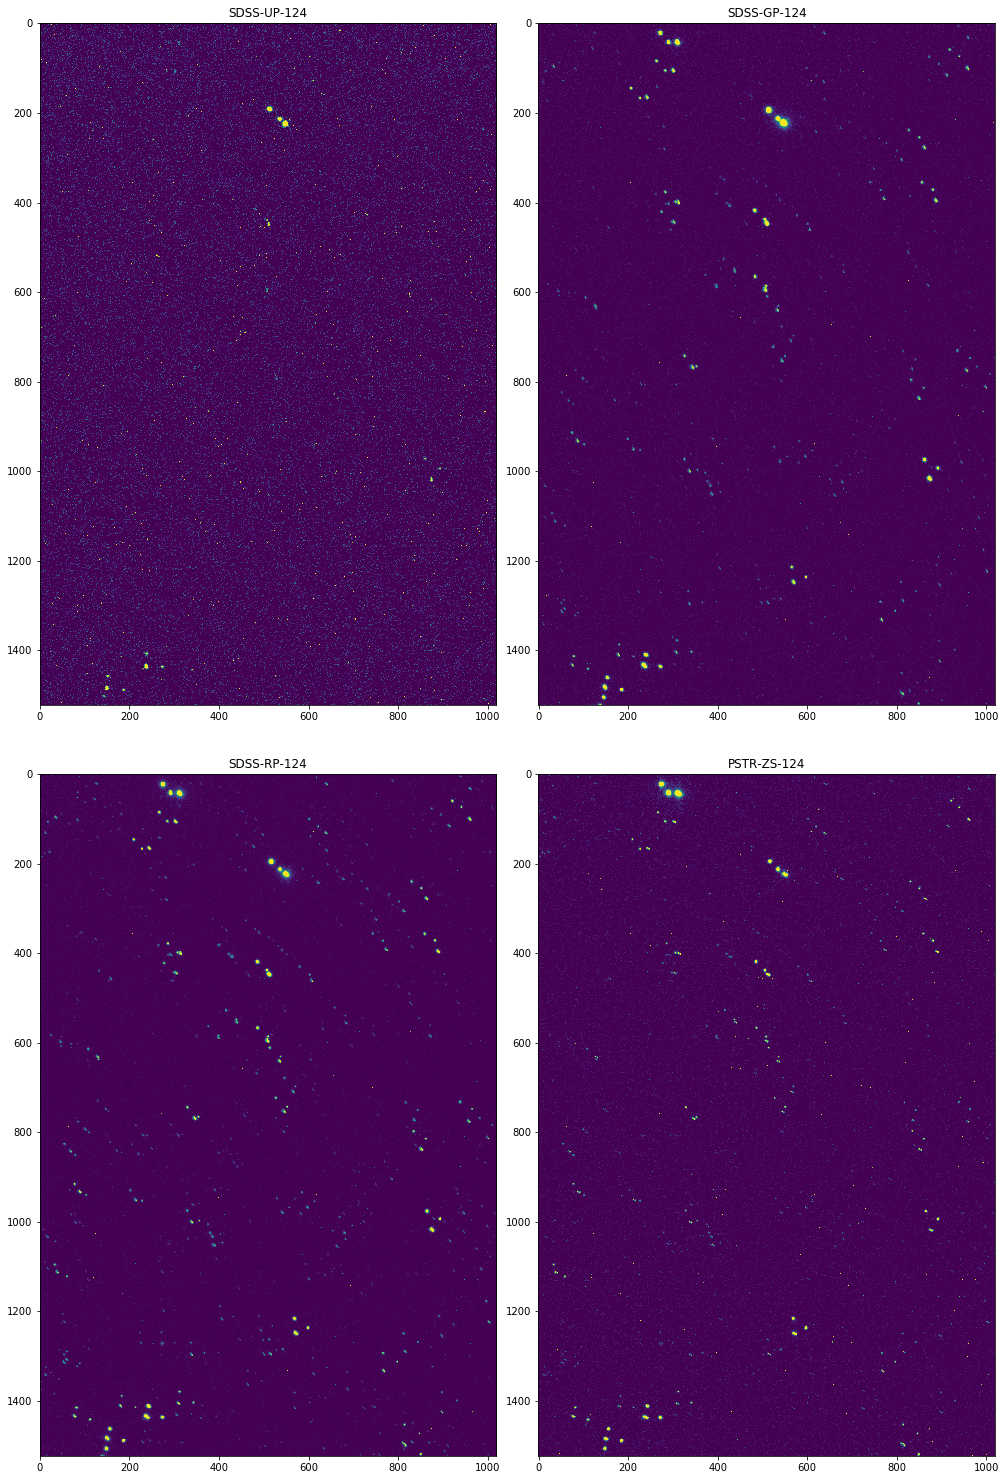

In [116]:
fig,ax=plt.subplots(figsize=(14,21))
fig.clf()
for n,ufilt in enumerate(pd.unique(phot.dic.filt)):
    frames=phot.dic.img[phot.dic.filt==ufilt]
    framestack=np.sum(np.dstack((frames)),axis=2)
    ax=fig.add_subplot(2,2,n+1)
    plot_lco(framestack,ax)
    ax.set_title(ufilt)
plt.tight_layout()
plt.savefig('LCO_first_data_COJ.png')

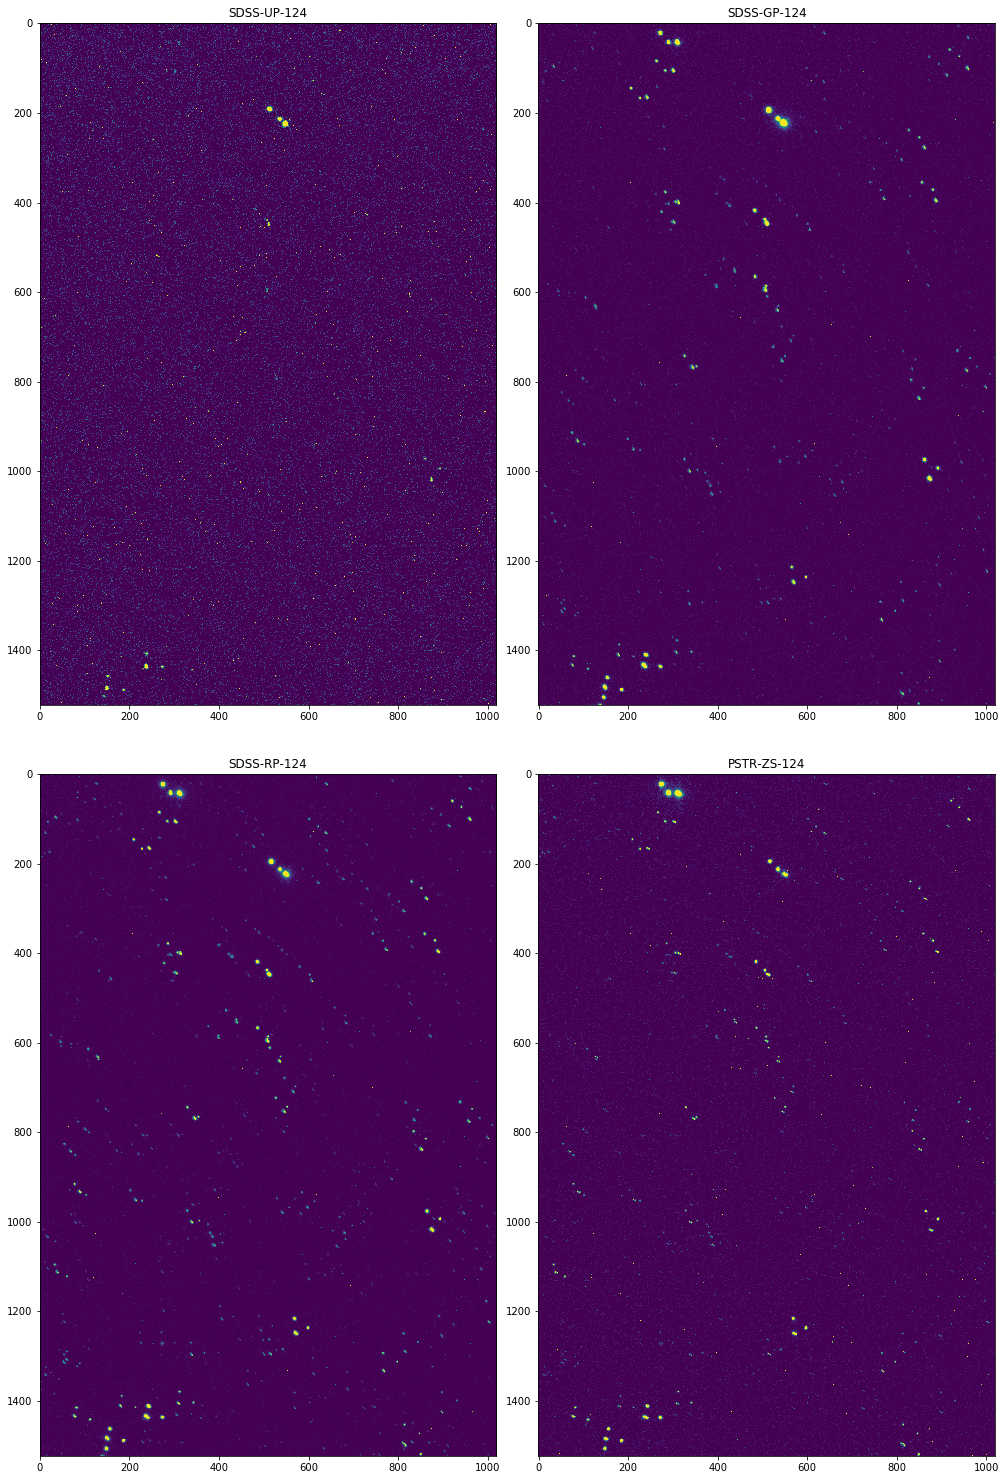

In [118]:
fig=plt.figure(11,figsize=(14,21))
for n,ufilt in enumerate(pd.unique(phot.dic.filt)):
    frames=phot.dic.img[phot.dic.filt==ufilt]
    framestack=np.sum(np.dstack((frames)),axis=2)
    ax=fig.add_subplot(2,2,n+1)
    plot_lco(framestack,ax)
    ax.set_title(ufilt)
plt.tight_layout()
plt.savefig('LCO_first_data_OGG.png')

### Test space
I usually use the lower half of an ipynb nb for testing. You can probably ignore all of this:

In [49]:
import 
rw[1].header['DATE-OBS']

SIMPLE  =                    T / A valid FITS file                              
BITPIX  =                   16 / [bits] Bits per pixel                          
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 1568 / [pixels]                                       
NAXIS2  =                 1056 / [pixels]                                       
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
XTENSION= 'BINTABLE'           / binary table extension                         
DATADICV= 'LCOGT-DIC.FITS-0.11.0' / Version number of the data dictionary       
HDRVER  = 'LCOGT-HDR-1.4.0'    / Version number of the headers                  
ORIGIN  = 'LCOGT   '           / Organization responsible for the data          
SITEID  = 'coj     '           / ID code of the Observatory site                
SITE    = 'LCOGT node at Sid

/Users/hosborn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


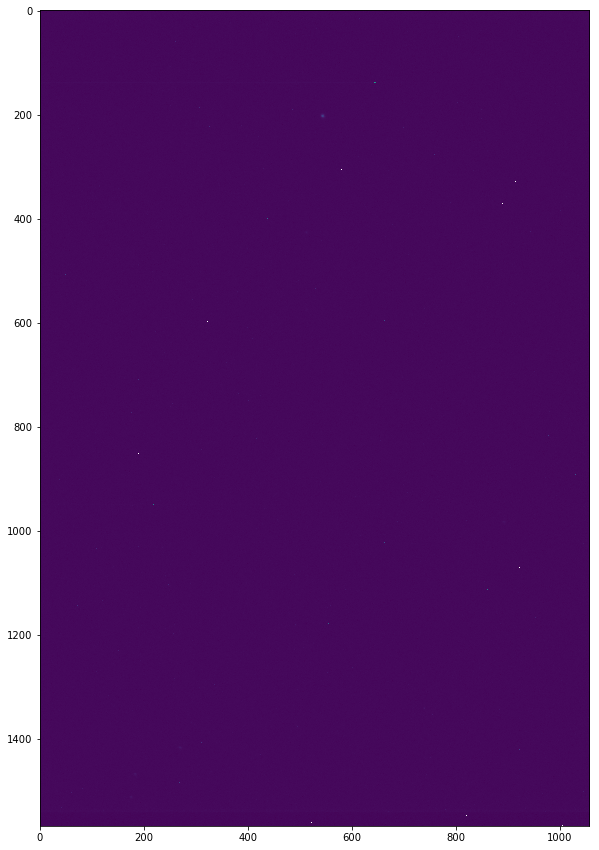

In [44]:
plt.figure(6,figsize=(10,15))
plt.imshow(np.rot90(np.sqrt(rw[1].data-0.95*np.median(rw[1].data)),k=3))

In [212]:
print(rw[1].header['CAT-RA'])
print(rw[1].header['CAT-DEC'])
print(rw[1].header['RLEVEL'])

05:23:31.012
-01:10:23.71
91


In [16]:
rw[1].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1523 / width of table in bytes                        
NAXIS2  =                 1020 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
XTENSION= 'BINTABLE'           / binary table extension                         
DATADICV= 'LCOGT-DIC.FITS-0.11.0' / Version number of the data dictionary       
HDRVER  = 'LCOGT-HDR-1.4.0'    / Version number of the headers                  
ORIGIN  = 'LCOGT   '           / Organization responsible for the data          
SITEID  = 'coj     '           / ID code of the Observatory site                
SITE    = 'LCOGT node at Sid